# 資料匯入(MNIST)及預處理

In [1]:
import numpy as np
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
# 第一次執行會下載到 '~/.keras/datasets/'
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11460608/11490434 [============================>.] - ETA: 0s

In [3]:
# 灰階的數值是0~255
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [4]:
y_train[:1]

array([5], dtype=uint8)

In [5]:
X_train[:1,:].shape

(1, 28, 28)

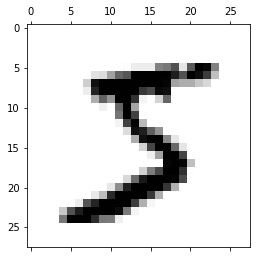

In [6]:
import matplotlib.pyplot as plt
train_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# 預處理
# reshape from (60000, 28, 28) to (60000, 784)
X_train = X_train.reshape(X_train.shape[0], -1) / 255 
X_test = X_test.reshape(X_test.shape[0], -1) / 255 
# one-hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_train[:1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [11]:
y_train[:1]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [12]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


# Classifier & Tuning hyperparameters
#### 註：若使用TensorFlow backend 且已經設置好GPU，Keras會自動使用GPU建模

In [13]:
import matplotlib.pyplot as plt

def train(batch_size):
    model = Sequential()
    model.add(Dense(256, input_dim=784, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0)
    return history

def plot_train_history(history, train_metrics, val_metrics, batch_size):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.title('batch_size=' + str(batch_size))

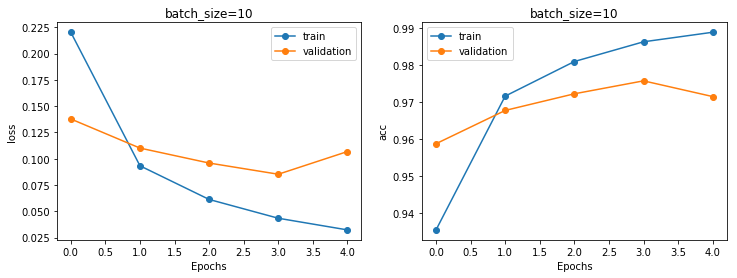

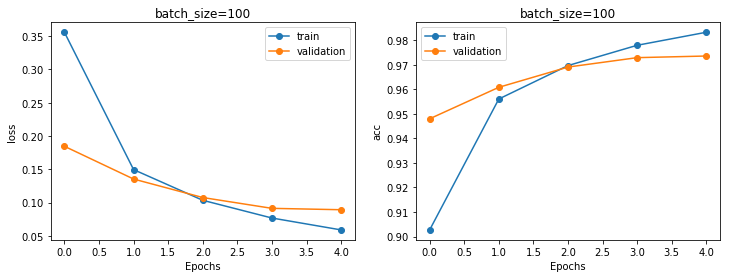

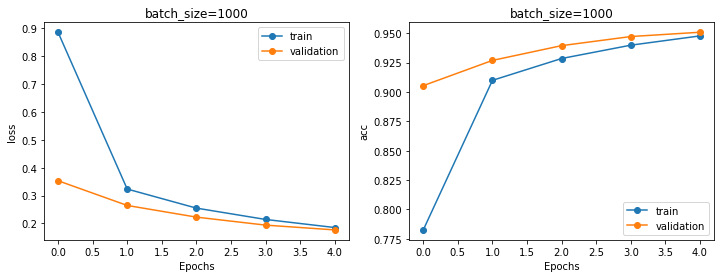

In [15]:
%matplotlib inline
#batch_size_list = np.arange(100,3000,1000)
batch_size_list = [10,100,1000]
#batch_size_list = [1000]
for batch_size in batch_size_list:
    history = train(batch_size)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plot_train_history(history, 'loss','val_loss', batch_size)
    plt.subplot(1,2,2)
    plot_train_history(history, 'acc','val_acc', batch_size)

#### Now, you can tune other hyperparameters in the same way...

# Keras + sklearn Kfold

In [16]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("acc")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


In [17]:
def MLP_model():
    model = Sequential()
    model.add(Dense(256, input_dim=784, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
10800/10800 [==============================] - 1s - loss: 0.8779 - acc: 0.7831     
Epoch 2/10
10800/10800 [==============================] - 0s - loss: 0.3270 - acc: 0.9116     
Epoch 3/10
10800/10800 [==============================] - 0s - loss: 0.2582 - acc: 0.9281     
Epoch 4/10
10800/10800 [==============================] - 0s - loss: 0.2147 - acc: 0.9422     
Epoch 5/10
10800/10800 [==============================] - 1s - loss: 0.1858 - acc: 0.9476     
Epoch 6/10
10800/10800 [==============================] - 0s - loss: 0.1550 - acc: 0.9569     
Epoch 7/10
10800/10800 [==============================] - 1s - loss: 0.1364 - acc: 0.9637     
Epoch 8/10
10800/10800 [==============================] - 0s - loss: 0.1206 - acc: 0.9681     
Epoch 9/10
10800/10800 [==============================] - 0s - loss: 0.1033 - acc: 0.9753     
Epoch 10/10
10800/10800 [==============================] - 0s     
Epoch 1/10
21600/21600 [==============================] - 2s - loss: 0.6209 - 

43200/43200 [==============================] - 3s - loss: 0.2016 - acc: 0.9431     
Epoch 3/10
43200/43200 [==============================] - 3s - loss: 0.1423 - acc: 0.9595     
Epoch 4/10
43200/43200 [==============================] - 3s - loss: 0.1107 - acc: 0.9685     
Epoch 5/10
43200/43200 [==============================] - 3s - loss: 0.0876 - acc: 0.9745     
Epoch 6/10
43200/43200 [==============================] - 3s - loss: 0.0703 - acc: 0.9804     
Epoch 7/10
43200/43200 [==============================] - 3s - loss: 0.0575 - acc: 0.9844     
Epoch 8/10
43200/43200 [==============================] - 3s - loss: 0.0480 - acc: 0.9869     
Epoch 9/10
43200/43200 [==============================] - 3s - loss: 0.0398 - acc: 0.9898     
Epoch 10/10
54000/54000 [==============================] - 5s - loss: 0.4131 - acc: 0.8917     
Epoch 2/10
54000/54000 [==============================] - 4s - loss: 0.1763 - acc: 0.9499     
Epoch 3/10
54000/54000 [==============================] - 4s

54000/54000 [==============================] - 4s - loss: 0.1740 - acc: 0.9508     
Epoch 3/10
54000/54000 [==============================] - 4s - loss: 0.1227 - acc: 0.9640     
Epoch 4/10
54000/54000 [==============================] - 4s - loss: 0.0949 - acc: 0.9722     
Epoch 5/10
54000/54000 [==============================] - 4s - loss: 0.0742 - acc: 0.9787     
Epoch 6/10
54000/54000 [==============================] - 4s - loss: 0.0599 - acc: 0.9825     
Epoch 7/10
54000/54000 [==============================] - 4s - loss: 0.0499 - acc: 0.9856     
Epoch 8/10
54000/54000 [==============================] - 4s - loss: 0.0400 - acc: 0.9890     
Epoch 9/10
54000/54000 [==============================] - 4s - loss: 0.0333 - acc: 0.9909     
Epoch 10/10
10800/10800 [==============================] - 1s - loss: 0.8848 - acc: 0.7807     
Epoch 2/10
10800/10800 [==============================] - 0s - loss: 0.3347 - acc: 0.9075     
Epoch 3/10
10800/10800 [==============================] - 0s

10800/10800 [==============================] - 0s - loss: 0.2619 - acc: 0.9275     
Epoch 4/10
10800/10800 [==============================] - 0s - loss: 0.2210 - acc: 0.9393     
Epoch 5/10
10800/10800 [==============================] - 0s - loss: 0.1893 - acc: 0.9485     
Epoch 6/10
10800/10800 [==============================] - 0s - loss: 0.1666 - acc: 0.9533     
Epoch 7/10
10800/10800 [==============================] - 0s - loss: 0.1425 - acc: 0.9616     
Epoch 8/10
10800/10800 [==============================] - 0s - loss: 0.1254 - acc: 0.9671     
Epoch 9/10
10800/10800 [==============================] - 0s - loss: 0.1103 - acc: 0.9699     
Epoch 10/10
21600/21600 [==============================] - 2s - loss: 0.6392 - acc: 0.8372     
Epoch 2/10
21600/21600 [==============================] - 1s - loss: 0.2636 - acc: 0.9276     
Epoch 3/10
21600/21600 [==============================] - 1s - loss: 0.2006 - acc: 0.9445     
Epoch 4/10
21600/21600 [==============================] - 1s

<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>

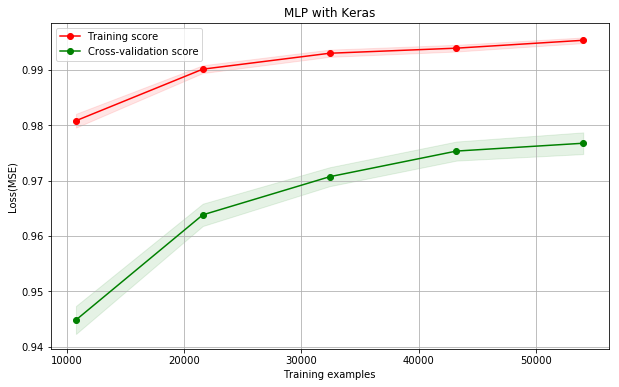

In [18]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KerasClassifier(build_fn=MLP_model, nb_epoch=3, batch_size=200)

plot_learning_curve(estimator, "MLP with Keras", X_train, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5),)